In [1]:
# Basic Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# importing model instance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


# for ploting decision tree
from sklearn.tree import plot_tree

# for sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler

# for hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for spilitting dataset
from sklearn.model_selection import train_test_split

# importing evalutionary parameters
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix


# To ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Problem Statement 

# Data Gathering 

In [2]:
df = pd.read_csv('churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Drop columns 

In [4]:
drop_cols = ["RowNumber", "CustomerId", "Surname"]
df.drop(columns=drop_cols, inplace=True)

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Explorotary Data Analysis

In [6]:
#Checking missing values

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['CreditScore']

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

In [12]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [13]:
df['Balance']

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [14]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [15]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [16]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
df['EstimatedSalary']

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Feature Engeering 

In [19]:
#apply one hot encodeing to  Gender and Geography
df = pd.get_dummies(df ,columns=['Gender', 'Geography'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


### Outlier detection 

<AxesSubplot:>

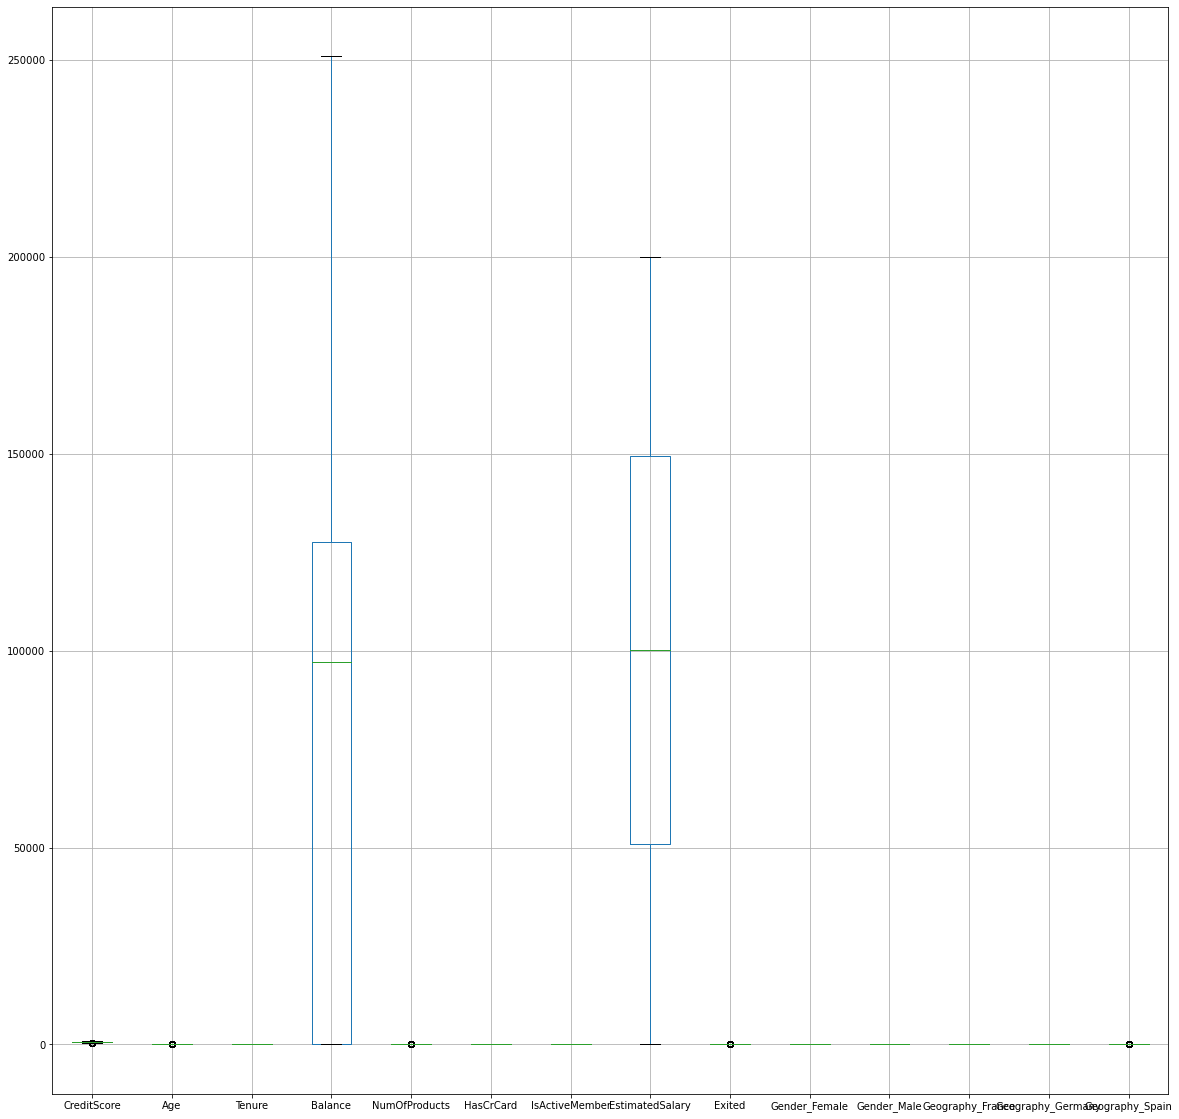

In [20]:
plt.figure(figsize=(20,20))
df.boxplot()

<AxesSubplot:xlabel='CreditScore'>

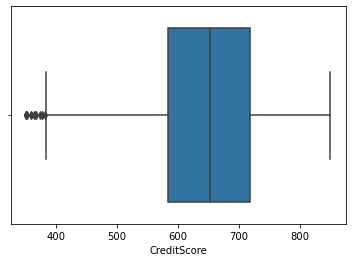

In [21]:
sns.boxplot(df['CreditScore'])

In [22]:
q1 = df['CreditScore'].quantile(0.25)
q2 = df['CreditScore'].quantile(0.50)
q3 = df['CreditScore'].quantile(0.75)
IQR = q3-q1
uppertail = q3+1.5*IQR
lowertail = q1-1.5*IQR
print(' first quartile :-',q1,"\n second qurartile :-",q2,"\n Third quartile :-",q3)
print(' IQR :-',IQR)
print(' Uppertail :-',uppertail)
print(" Lowertail :-",lowertail)

 first quartile :- 584.0 
 second qurartile :- 652.0 
 Third quartile :- 718.0
 IQR :- 134.0
 Uppertail :- 919.0
 Lowertail :- 383.0


In [23]:
outlier = df[['CreditScore']].loc[(df['CreditScore']<lowertail)].count() # outerliers 
print('Oultliers are : - ',outlier)

Oultliers are : -  CreditScore    15
dtype: int64


652.0


<AxesSubplot:>

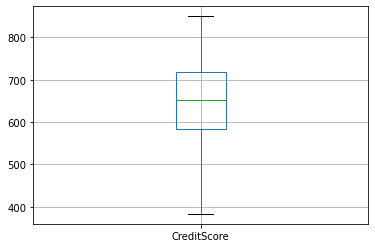

In [24]:
size_df=df[['CreditScore']].loc[(df['CreditScore'] < uppertail) & (df['CreditScore'] > lowertail)].median()[0]
print(size_df)
df.loc[(df['CreditScore'] > uppertail) | (df['CreditScore'] < lowertail), 'CreditScore'] = size_df
df[['CreditScore']].boxplot()

<AxesSubplot:xlabel='Age'>

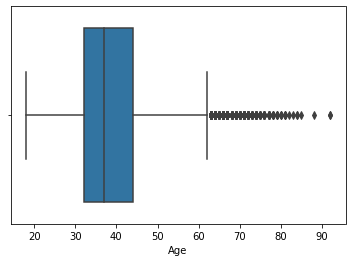

In [25]:
sns.boxplot(df['Age'])

 first quartile :- 32.0 
 second qurartile :- 37.0 
 Third quartile :- 44.0
 IQR :- 12.0
 Uppertail :- 62.0
 Lowertail :- 14.0
37.0


<AxesSubplot:>

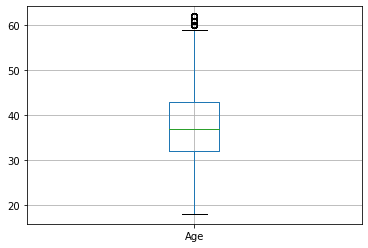

In [26]:
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)
IQR = q3-q1
uppertail = q3+1.5*IQR
lowertail = q1-1.5*IQR
print(' first quartile :-',q1,"\n second qurartile :-",q2,"\n Third quartile :-",q3)
print(' IQR :-',IQR)
print(' Uppertail :-',uppertail)
print(" Lowertail :-",lowertail)


size_df=df[['Age']].loc[(df['Age'] < uppertail) & (df['Age'] > lowertail)].median()[0]
print(size_df)  

df.loc[(df['Age'] > uppertail) | (df['Age'] < lowertail), 'Age'] = size_df
df[['Age']].boxplot()

<AxesSubplot:xlabel='NumOfProducts'>

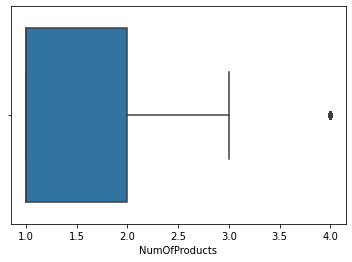

In [27]:
sns.boxplot(df['NumOfProducts'])

In [28]:
q1 = df['NumOfProducts'].quantile(0.25)
q2 = df['NumOfProducts'].quantile(0.50)
q3 = df['NumOfProducts'].quantile(0.75)
IQR = q3-q1
uppertail = q3+1.5*IQR
lowertail = q1-1.5*IQR
print(' first quartile :-',q1,"\n second qurartile :-",q2,"\n Third quartile :-",q3)
print(' IQR :-',IQR)
print(' Uppertail :-',uppertail)
print(" Lowertail :-",lowertail)

 first quartile :- 1.0 
 second qurartile :- 1.0 
 Third quartile :- 2.0
 IQR :- 1.0
 Uppertail :- 3.5
 Lowertail :- -0.5


1.0


<AxesSubplot:>

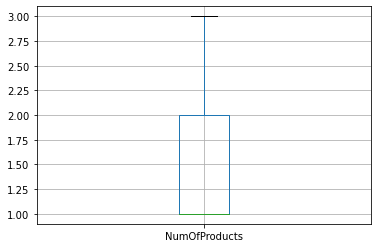

In [29]:
size_df=df[['NumOfProducts']].loc[(df['NumOfProducts'] < uppertail) & (df['NumOfProducts'] > lowertail)].median()[0]
print(size_df)  

df.loc[(df['NumOfProducts'] > uppertail) | (df['NumOfProducts'] < lowertail), 'NumOfProducts'] = size_df
df[['NumOfProducts']].boxplot()

###  Balancing data 

In [30]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

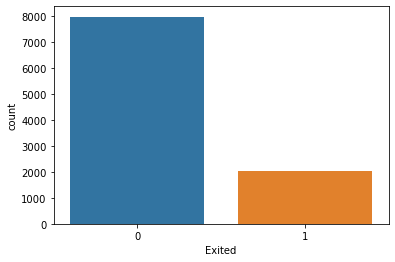

In [31]:
sns.countplot(x  = df['Exited'])

#### Smote 

In [125]:
x = df.drop("Exited", axis= 1)
y = df["Exited"]

In [33]:
# Create an instance
smote=SMOTE(random_state=1000)
x,y=smote.fit_resample(x, y) 
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## List Creating For Ultimate Analysis

In [34]:
model_lst=[]
training_acc_lst=[]
testing_acc_lst=[]

## Model Training On Logestic Reg 

In [35]:
model_name="model_logestic"
model_lst.append(model_name)
print(model_lst)

['model_logestic']


In [36]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100,stratify=y)
model_logestic=LogisticRegression()
model_logestic.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11944, 13)
(3982, 13)
(11944,)
(3982,)


## Model Evaluation On Logestic Reg 

In [37]:
print("*******************Classification Report On Testing Data************************")
y_pred=model_logestic.predict(x_test)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix------>",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 1 1 ... 1 0 0]
********************************************************************************
Accuracy_score:  0.6800602712204922
********************************************************************************
Confusion Matrix------> [[1296  695]
 [ 579 1412]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.69      0.65      0.67      1991
           1       0.67      0.71      0.69      1991

    accuracy                           0.68      3982
   macro avg       0.68      0.68      0.68      3982
weighted avg       0.68      0.68      0.68      3982

********************************************************************************


In [38]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_logestic.predict(x_train)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)


training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[0 0 1 ... 1 0 0]
********************************************************************************
Accuracy_score:  0.6722203616878768
********************************************************************************
Confusion Matrix
 [[3885 2087]
 [1828 4144]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.68      0.65      0.66      5972
           1       0.67      0.69      0.68      5972

    accuracy                           0.67     11944
   macro avg       0.67      0.67      0.67     11944
weighted avg       0.67      0.67      0.67     11944

********************************************************************************


## Model Training On KNN

In [39]:
model_name="model_KNN"
model_lst.append(model_name)
# print(model_lst)

In [40]:
model_KNN=KNeighborsClassifier()
model_KNN

KNeighborsClassifier()

In [41]:
model_KNN.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11944, 13)
(3982, 13)
(11944,)
(3982,)


## Model Evaluation On KNN

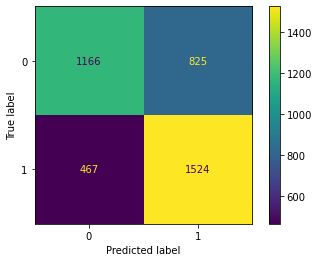

In [42]:
plot_confusion_matrix(model_KNN,x_test, y_test)

In [43]:
print("*******************Classification Report On Testing Data************************")
y_pred=model_KNN.predict(x_test)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix------>",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 0 1 ... 1 0 1]
********************************************************************************
Accuracy_score:  0.6755399296835761
********************************************************************************
Confusion Matrix------> [[1166  825]
 [ 467 1524]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.71      0.59      0.64      1991
           1       0.65      0.77      0.70      1991

    accuracy                           0.68      3982
   macro avg       0.68      0.68      0.67      3982
weighted avg       0.68      0.68      0.67      3982

********************************************************************************


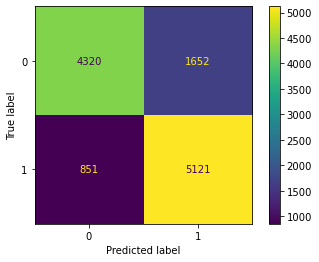

In [44]:
plot_confusion_matrix(model_KNN,x_train, y_train)

In [45]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_KNN.predict(x_train)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)

training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[0 0 0 ... 0 1 0]
********************************************************************************
Accuracy_score:  0.7904387139986604
********************************************************************************
Confusion Matrix
 [[4320 1652]
 [ 851 5121]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      5972
           1       0.76      0.86      0.80      5972

    accuracy                           0.79     11944
   macro avg       0.80      0.79      0.79     11944
weighted avg       0.80      0.79      0.79     11944

********************************************************************************


## Normalization

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [47]:
x_df = df.drop("Exited", axis=1)
normal_scalar=MinMaxScaler()
array_normal=normal_scalar.fit_transform(x_df)
x_normal_df=pd.DataFrame(array_normal, columns=x.columns)
x_normal_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.505353,0.545455,0.2,0.000000,0.0,1.0,1.0,0.506735,1.0,0.0,1.0,0.0,0.0
1,0.481799,0.522727,0.1,0.334031,0.0,0.0,1.0,0.562709,1.0,0.0,0.0,0.0,1.0
2,0.254818,0.545455,0.8,0.636357,1.0,1.0,0.0,0.569654,1.0,0.0,1.0,0.0,0.0
3,0.676660,0.477273,0.1,0.000000,0.5,0.0,0.0,0.469120,1.0,0.0,1.0,0.0,0.0
4,1.000000,0.568182,0.2,0.500246,0.0,1.0,1.0,0.395400,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.830835,0.477273,0.5,0.000000,0.5,1.0,0.0,0.481341,0.0,1.0,1.0,0.0,0.0
9996,0.284797,0.386364,1.0,0.228657,0.0,1.0,1.0,0.508490,0.0,1.0,1.0,0.0,0.0
9997,0.698073,0.409091,0.7,0.000000,0.0,0.0,1.0,0.210390,1.0,0.0,1.0,0.0,0.0
9998,0.832976,0.545455,0.3,0.299226,0.5,1.0,0.0,0.464429,0.0,1.0,0.0,1.0,0.0


## Train Test Split for Normalization

In [48]:
# For Normalization
x = x_normal_df.copy()
y = df["Exited"]
x_train_N, x_test_N, y_train_N, y_test_N = train_test_split(x, y, test_size=0.25, random_state=100, stratify=y)

In [49]:
model_name="model_KNN_normal"
model_lst.append(model_name)
# print(model_lst)

In [50]:
model_KNN_normal=KNeighborsClassifier()
model_KNN_normal

KNeighborsClassifier()

In [51]:
model_KNN_normal.fit(x_train_N, y_train_N)

KNeighborsClassifier()

## Model Evaluation On KNN With Normalization

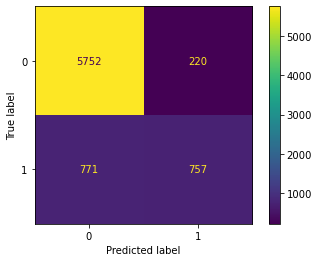

In [52]:
plot_confusion_matrix(model_KNN_normal, x_train_N, y_train_N)

In [53]:
print("*******************Classification Report On Testing Data************************")
y_pred=model_KNN_normal.predict(x_test_N)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test_N, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test_N, y_pred)
print("Confusion Matrix------>",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test_N, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 0 1 ... 0 0 0]
********************************************************************************
Accuracy_score:  0.8208
********************************************************************************
Confusion Matrix------> [[1894   97]
 [ 351  158]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1991
           1       0.62      0.31      0.41       509

    accuracy                           0.82      2500
   macro avg       0.73      0.63      0.65      2500
weighted avg       0.80      0.82      0.80      2500

********************************************************************************


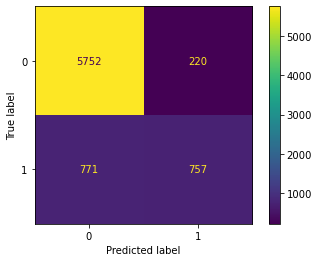

In [54]:
plot_confusion_matrix(model_KNN_normal,x_train_N, y_train_N)

In [55]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_KNN_normal.predict(x_train_N)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train_N, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train_N, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train_N, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)

training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[0 0 0 ... 1 0 0]
********************************************************************************
Accuracy_score:  0.8678666666666667
********************************************************************************
Confusion Matrix
 [[5752  220]
 [ 771  757]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      5972
           1       0.77      0.50      0.60      1528

    accuracy                           0.87      7500
   macro avg       0.83      0.73      0.76      7500
weighted avg       0.86      0.87      0.86      7500

********************************************************************************


In [56]:
model_KNN_normal_hyper_grid=KNeighborsClassifier()
model_KNN_normal_hyper_grid

KNeighborsClassifier()

In [57]:
model_name="model_KNN_normal_hyper_grid"
model_lst.append(model_name)
# print(model_lst)

In [58]:
hyperparameters={"n_neighbors":np.arange(2,10),
                "p":[1,2]}
model_KNN_normal_hyper_grid=GridSearchCV(model_KNN_normal_hyper_grid,hyperparameters, cv=5)
model_KNN_normal_hyper_grid.fit(x_train_N, y_train_N)
model_KNN_normal_hyper_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

## Model Evaluation On KNN With Normalization with Hyperparameter

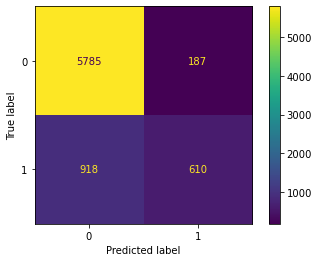

In [59]:
plot_confusion_matrix(model_KNN_normal_hyper_grid.best_estimator_, x_train_N, y_train_N)

In [60]:
print("*******************Classification Report On Testing Data************************")
model_KNN_normal_hyper_grid=model_KNN_normal_hyper_grid.best_estimator_
y_pred=model_KNN_normal_hyper_grid.predict(x_test_N)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test_N, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test_N, y_pred)
print("Confusion Matrix------>",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test_N, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 1 0 ... 0 0 0]
********************************************************************************
Accuracy_score:  0.816
********************************************************************************
Confusion Matrix------> [[1916   75]
 [ 385  124]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1991
           1       0.62      0.24      0.35       509

    accuracy                           0.82      2500
   macro avg       0.73      0.60      0.62      2500
weighted avg       0.79      0.82      0.78      2500

********************************************************************************


In [61]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_KNN_normal_hyper_grid.predict(x_train_N)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train_N, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train_N, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train_N, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)

training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[0 0 0 ... 1 0 0]
********************************************************************************
Accuracy_score:  0.8526666666666667
********************************************************************************
Confusion Matrix
 [[5785  187]
 [ 918  610]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      5972
           1       0.77      0.40      0.52      1528

    accuracy                           0.85      7500
   macro avg       0.81      0.68      0.72      7500
weighted avg       0.84      0.85      0.83      7500

********************************************************************************


## Standardization

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [63]:
x_df = df.drop("Exited", axis=1)
std_scalar=StandardScaler()
array_std=std_scalar.fit_transform(x_df)
x_std_df=pd.DataFrame(array_std, columns=x.columns)
x_std_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.332983,0.490105,-1.041760,-1.225848,-0.930425,0.646092,0.970243,0.021886,1.095988,-1.095988,0.997204,-0.578736,-0.573809
1,-0.447572,0.374424,-1.387538,0.117350,-0.930425,-1.547768,0.970243,0.216534,1.095988,-1.095988,-1.002804,-0.578736,1.742740
2,-1.551792,0.490105,1.032908,1.333053,2.702630,0.646092,-1.030670,0.240687,1.095988,-1.095988,0.997204,-0.578736,-0.573809
3,0.500391,0.143063,-1.387538,-1.225848,0.886102,-1.547768,-1.030670,-0.108918,1.095988,-1.095988,0.997204,-0.578736,-0.573809
4,2.073384,0.605786,-1.041760,0.785728,-0.930425,0.646092,0.970243,-0.365276,1.095988,-1.095988,-1.002804,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.250427,0.143063,-0.004426,-1.225848,0.886102,0.646092,-1.030670,-0.066419,-0.912419,0.912419,0.997204,-0.578736,-0.573809
9996,-1.405951,-0.319661,1.724464,-0.306379,-0.930425,0.646092,0.970243,0.027988,-0.912419,0.912419,0.997204,-0.578736,-0.573809
9997,0.604563,-0.203980,0.687130,-1.225848,-0.930425,-1.547768,0.970243,-1.008643,1.095988,-1.095988,0.997204,-0.578736,-0.573809
9998,1.260844,0.490105,-0.695982,-0.022608,0.886102,0.646092,-1.030670,-0.125231,-0.912419,0.912419,-1.002804,1.727904,-0.573809


## Train Test Split for Standardization

In [64]:
x = x_std_df.copy()
y = df["Exited"]
x_train_S, x_test_S, y_train_S, y_test_S = train_test_split(x, y, test_size=0.25, random_state=100, stratify=y)

In [65]:
model_KNN_std=KNeighborsClassifier()
model_KNN_std

KNeighborsClassifier()

In [66]:
model_name="model_KNN_std"
model_lst.append(model_name)
# print(model_lst)

In [67]:
model_KNN_std.fit(x_train_S, y_train_S)

KNeighborsClassifier()

## Model Evaluation On KNN With Standardization

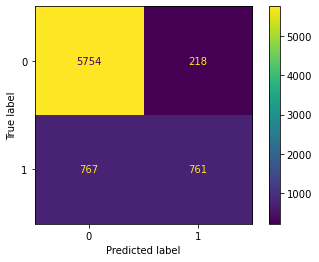

In [68]:
plot_confusion_matrix(model_KNN_std, x_train_S, y_train_S)

In [69]:
print("*******************Classification Report On Testing Data************************")
y_pred=model_KNN_std.predict(x_test_S)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test_S, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test_S, y_pred)
print("Confusion Matrix------>",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test_S, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 1 1 ... 0 0 0]
********************************************************************************
Accuracy_score:  0.8196
********************************************************************************
Confusion Matrix------> [[1884  107]
 [ 344  165]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      1991
           1       0.61      0.32      0.42       509

    accuracy                           0.82      2500
   macro avg       0.73      0.64      0.66      2500
weighted avg       0.80      0.82      0.80      2500

********************************************************************************


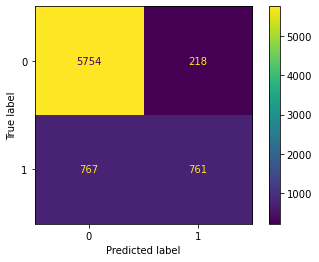

In [70]:
plot_confusion_matrix(model_KNN_std,x_train_S, y_train_S)

In [71]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_KNN_std.predict(x_train_S)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train_S, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train_S, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train_S, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)

training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[0 0 0 ... 1 0 0]
********************************************************************************
Accuracy_score:  0.8686666666666667
********************************************************************************
Confusion Matrix
 [[5754  218]
 [ 767  761]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      5972
           1       0.78      0.50      0.61      1528

    accuracy                           0.87      7500
   macro avg       0.83      0.73      0.76      7500
weighted avg       0.86      0.87      0.86      7500

********************************************************************************


In [72]:
model_KNN_std_hyper_grid=KNeighborsClassifier()
model_KNN_std_hyper_grid

KNeighborsClassifier()

In [73]:
model_name="model_KNN_std_hyper_grid"
model_lst.append(model_name)
# print(model_lst)

In [74]:
hyperparameters={"n_neighbors":np.arange(2,10),
                "p":[1,2]}
model_KNN_std_hyper_grid=GridSearchCV(model_KNN_std_hyper_grid,hyperparameters, cv=5)
model_KNN_std_hyper_grid.fit(x_train_S, y_train_S)
model_KNN_std_hyper_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

## Model Evaluation On KNN With Standardization with Hyperparameter

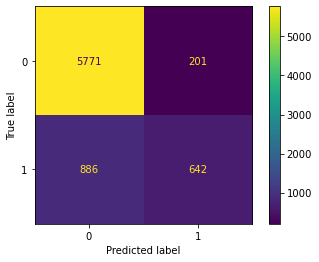

In [75]:
plot_confusion_matrix(model_KNN_std_hyper_grid.best_estimator_, x_train_S, y_train_S)

In [76]:
print("*******************Classification Report On Testing Data************************")
model_KNN_std_hyper_grid=model_KNN_std_hyper_grid.best_estimator_
y_pred=model_KNN_std_hyper_grid.predict(x_test_S)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test_S, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test_S, y_pred)
print("Confusion Matrix------>",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test_S, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 0 0 ... 0 0 0]
********************************************************************************
Accuracy_score:  0.82
********************************************************************************
Confusion Matrix------> [[1907   84]
 [ 366  143]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      1991
           1       0.63      0.28      0.39       509

    accuracy                           0.82      2500
   macro avg       0.73      0.62      0.64      2500
weighted avg       0.80      0.82      0.79      2500

********************************************************************************


In [77]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_KNN_std_hyper_grid.predict(x_train_S)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train_S, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train_S, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train_S, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)

training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[0 0 0 ... 1 0 0]
********************************************************************************
Accuracy_score:  0.8550666666666666
********************************************************************************
Confusion Matrix
 [[5771  201]
 [ 886  642]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      5972
           1       0.76      0.42      0.54      1528

    accuracy                           0.86      7500
   macro avg       0.81      0.69      0.73      7500
weighted avg       0.85      0.86      0.84      7500

********************************************************************************


## Model Training On Random Forest

In [78]:
model_RF_without_hyper=RandomForestClassifier(random_state=100)
model_RF_without_hyper
model_RF_without_hyper.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11944, 13)
(3982, 13)
(11944,)
(3982,)


In [79]:
model_name="model_RF_without_hyper"
model_lst.append(model_name)
# print(model_lst)

## Model Evaluation On Random Forest Without Hyperparameter Tuning

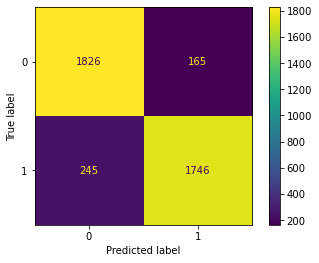

In [80]:
plot_confusion_matrix(model_RF_without_hyper,x_test, y_test)

In [81]:
print("*******************Classification Report On Testing Data************************")
y_pred=model_RF_without_hyper.predict(x_test)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix------>",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 1 1 ... 1 0 0]
********************************************************************************
Accuracy_score:  0.8970366649924661
********************************************************************************
Confusion Matrix------> [[1826  165]
 [ 245 1746]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1991
           1       0.91      0.88      0.89      1991

    accuracy                           0.90      3982
   macro avg       0.90      0.90      0.90      3982
weighted avg       0.90      0.90      0.90      3982

********************************************************************************


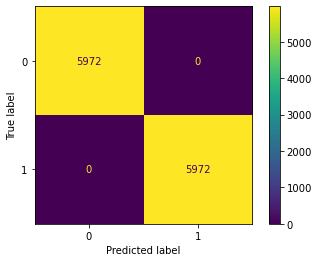

In [82]:
plot_confusion_matrix(model_RF_without_hyper,x_train, y_train)

In [83]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_RF_without_hyper.predict(x_train)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)

training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[1 0 0 ... 0 1 0]
********************************************************************************
Accuracy_score:  1.0
********************************************************************************
Confusion Matrix
 [[5972    0]
 [   0 5972]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944

********************************************************************************


## Model Evaluation On Random Forest With Hyperparameter Tuning

In [84]:
model_RF_with_hyper_random=RandomForestClassifier(random_state=100, n_jobs=-1)
model_RF_with_hyper_random

RandomForestClassifier(n_jobs=-1, random_state=100)

In [85]:
model_name="model_RF_with_hyper_random"
model_lst.append(model_name)
# print(model_lst)

### RandomizedSearchCV

In [86]:
hyperparameters_RF={"n_estimators":np.arange(10,100),
                "criterion":["gini","entropy"],
                 "max_depth":np.arange(2,10),
                 "min_samples_split":np.arange(2,20),
                 "min_samples_leaf":np.arange(2,10),
                 "max_features":["sqrt","log2"],
                 "bootstrap":[True],
                 "oob_score":[True]}

model_RF_with_hyper_random=RandomizedSearchCV(model_RF_with_hyper_random, hyperparameters_RF, cv=5)
model_RF_with_hyper_random.fit(x_train, y_train)
model_RF_with_hyper_random.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=6, min_samples_split=6, n_estimators=24,
                       n_jobs=-1, oob_score=True, random_state=100)

In [87]:
model_RF_with_hyper_random=model_RF_with_hyper_random.best_estimator_
model_RF_with_hyper_random.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=6, min_samples_split=6, n_estimators=24,
                       n_jobs=-1, oob_score=True, random_state=100)

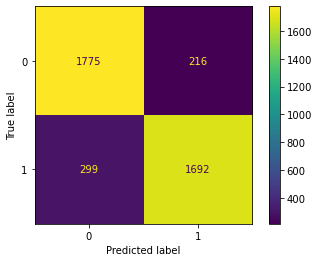

In [88]:
plot_confusion_matrix(model_RF_with_hyper_random,x_test, y_test)

In [89]:
print("*******************Classification Report On Testing Data************************")
y_pred=model_RF_with_hyper_random.predict(x_test)
# threshold value = 0.5
print(y_pred)
print("*"*80)
acc_score=accuracy_score(y_test, y_pred)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix------>\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_test, y_pred)
print("Classification Report:------->\n",clas_report)
print("*"*80)

testing_acc_lst.append(acc_score)

*******************Classification Report On Testing Data************************
[0 1 1 ... 1 1 0]
********************************************************************************
Accuracy_score:  0.870668006027122
********************************************************************************
Confusion Matrix------>
 [[1775  216]
 [ 299 1692]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1991
           1       0.89      0.85      0.87      1991

    accuracy                           0.87      3982
   macro avg       0.87      0.87      0.87      3982
weighted avg       0.87      0.87      0.87      3982

********************************************************************************


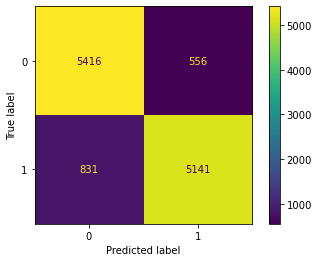

In [90]:
plot_confusion_matrix(model_RF_with_hyper_random,x_train, y_train)

In [91]:
print("*******************Classification Report On Training Data************************")
y_pred_train=model_RF_with_hyper_random.predict(x_train)
# threshold value = 0.5
print(y_pred_train)
print("*"*80)
acc_score=accuracy_score(y_train, y_pred_train)
print("Accuracy_score: ",acc_score)
print("*"*80)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix\n",cnf_matrix)
print("*"*80)
clas_report=classification_report(y_train, y_pred_train)
print("Classification Report:------->\n",clas_report)
print("*"*80)

training_acc_lst.append(acc_score)

*******************Classification Report On Training Data************************
[1 0 0 ... 0 1 0]
********************************************************************************
Accuracy_score:  0.8838747488278633
********************************************************************************
Confusion Matrix
 [[5416  556]
 [ 831 5141]]
********************************************************************************
Classification Report:------->
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      5972
           1       0.90      0.86      0.88      5972

    accuracy                           0.88     11944
   macro avg       0.88      0.88      0.88     11944
weighted avg       0.88      0.88      0.88     11944

********************************************************************************


In [92]:
model_RF_with_hyper_random.feature_importances_

array([0.03297128, 0.2128555 , 0.02211954, 0.05691731, 0.11453664,
       0.01705358, 0.14521348, 0.03021082, 0.09829691, 0.08403196,
       0.07877624, 0.04195478, 0.06506197])

<AxesSubplot:>

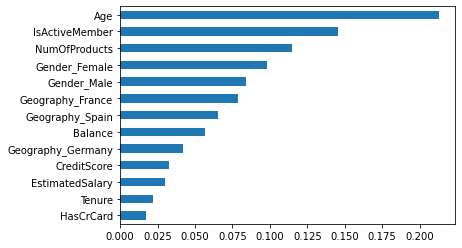

In [93]:
feature_ds=pd.Series(model_RF_with_hyper_random.feature_importances_, index=x.columns)
feature_ds.sort_values().plot(kind="barh")

### GridSearchCV

In [94]:
# hyperparameters_RF={"n_estimators":[100],
#                 "criterion":["gini","entropy"],
#                  "max_depth":np.arange(2,10),
#                  "min_samples_split":np.arange(2,20),
#                  "min_samples_leaf":np.arange(2,10),
#                  "max_features":["sqrt"],
#                  "bootstrap":[True],
#                  "oob_score":[True]}

# model_RF_with_hyper_grid=GridSearchCV(model_RF_with_hyper, hyperparameters_RF, cv=5)
# model_RF_with_hyper_grid.fit(x_train, y_train)
# model_RF_with_hyper_grid.best_estimator_

## Model Training On Decision Tree

In [95]:
model_Decision=DecisionTreeClassifier(random_state=100)
model_Decision

DecisionTreeClassifier(random_state=100)

In [96]:
model_name="model_Decision"
model_lst.append(model_name)
# print(model_lst)

In [97]:
model_Decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

## Model Evaluation On Decision Tree

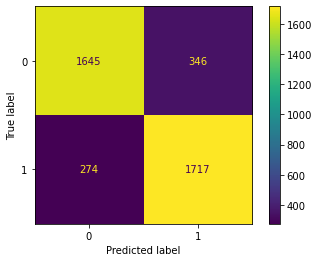

In [98]:
plot_confusion_matrix(model_Decision,x_test,y_test)

In [99]:
print("*************ON TESTING DATA******************")
y_pred=model_Decision.predict(x_test)

cnf_matrix=confusion_matrix(y_test, y_pred)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_test, y_pred)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_test, y_pred)
print("Classification Report",cla_report)


testing_acc_lst.append(acc_score)

*************ON TESTING DATA******************
confusion matrix 
 [[1645  346]
 [ 274 1717]]
********************************************************************************
accuracy score 
 0.844299347061778
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1991
           1       0.83      0.86      0.85      1991

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982



In [100]:
print("*************ON TRAINING DATA******************")
y_pred_train=model_Decision.predict(x_train)

cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_train, y_pred_train)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_train, y_pred_train)
print("Classification Report",cla_report)

training_acc_lst.append(acc_score)

*************ON TRAINING DATA******************
confusion matrix 
 [[5972    0]
 [   0 5972]]
********************************************************************************
accuracy score 
 1.0
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944



## Model Training On Decision Tree With Prunning

In [101]:
model_Decision_CCPrunning=DecisionTreeClassifier(random_state=1000)
result = model_Decision_CCPrunning.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']

In [102]:
model_name="model_Decision_CCPrunning"
model_lst.append(model_name)
# print(model_lst)

In [103]:
# train_accuracy_list = []
# test_accuracy_list = []

# for i in ccp_alpha_list:
#     model_Decision_CCPrunning = DecisionTreeClassifier(ccp_alpha= i,random_state=1000)
#     model_Decision_CCPrunning.fit(x_train, y_train)
    
#     training_accuracy = model_Decision_CCPrunning.score(x_train, y_train)
#     train_accuracy_list.append(training_accuracy)
    
#     testing_Accuracy = model_Decision_CCPrunning.score(x_test, y_test)
#     test_accuracy_list.append(testing_Accuracy)
    
# # test_accuracy_list

In [104]:
index_ccp = testing_acc_lst.index(max(testing_acc_lst))
index_ccp

6

In [105]:
best_ccp = ccp_alpha_list[index_ccp]

In [106]:
model_Decision_CCPrunning = DecisionTreeClassifier(ccp_alpha= best_ccp,random_state=1000)
model_Decision_CCPrunning.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=5.395549601845648e-05, random_state=1000)

## Model Evaluation On Decision Tree With Pruning

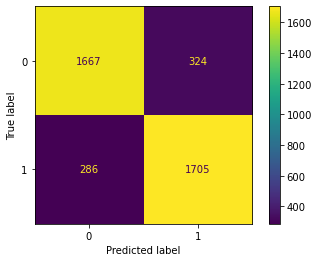

In [107]:
plot_confusion_matrix(model_Decision_CCPrunning,x_test,y_test)

In [108]:
print("*************ON TESTING DATA******************")
y_pred=model_Decision_CCPrunning.predict(x_test)

cnf_matrix=confusion_matrix(y_test, y_pred)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_test, y_pred)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_test, y_pred)
print("Classification Report",cla_report)

testing_acc_lst.append(acc_score)

*************ON TESTING DATA******************
confusion matrix 
 [[1667  324]
 [ 286 1705]]
********************************************************************************
accuracy score 
 0.8468106479156203
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1991
           1       0.84      0.86      0.85      1991

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982



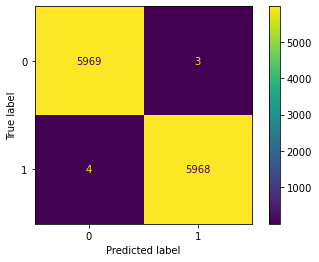

In [109]:
plot_confusion_matrix(model_Decision_CCPrunning, x_train, y_train)

In [110]:
print("*************ON TRAINING DATA******************")
y_pred_train=model_Decision_CCPrunning.predict(x_train)

cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_train, y_pred_train)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_train, y_pred_train)
print("Classification Report",cla_report)

training_acc_lst.append(acc_score)

*************ON TRAINING DATA******************
confusion matrix 
 [[5969    3]
 [   4 5968]]
********************************************************************************
accuracy score 
 0.9994139316811789
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944



# Model Training On AdaBoost

In [111]:
model_AdaBoost=AdaBoostClassifier(random_state=1000)
model_AdaBoost.fit(x_train, y_train)

AdaBoostClassifier(random_state=1000)

In [112]:
model_name="model_AdaBoost"
model_lst.append(model_name)
# print(model_lst)

## Model Evaluation on AdaBoost Without Hyperparameter Tuning

In [113]:
print("*************ON TESTING DATA******************")
y_pred=model_AdaBoost.predict(x_test)

cnf_matrix=confusion_matrix(y_test, y_pred)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_test, y_pred)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_test, y_pred)
print("Classification Report",cla_report)

testing_acc_lst.append(acc_score)

*************ON TESTING DATA******************
confusion matrix 
 [[1778  213]
 [ 313 1678]]
********************************************************************************
accuracy score 
 0.8679055750878956
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1991
           1       0.89      0.84      0.86      1991

    accuracy                           0.87      3982
   macro avg       0.87      0.87      0.87      3982
weighted avg       0.87      0.87      0.87      3982



In [114]:
print("*************ON TRAINING DATA******************")
y_pred_train=model_AdaBoost.predict(x_train)

cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_train, y_pred_train)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_train, y_pred_train)
print("Classification Report",cla_report)

training_acc_lst.append(acc_score)

*************ON TRAINING DATA******************
confusion matrix 
 [[5296  676]
 [ 957 5015]]
********************************************************************************
accuracy score 
 0.8632786336235767
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87      5972
           1       0.88      0.84      0.86      5972

    accuracy                           0.86     11944
   macro avg       0.86      0.86      0.86     11944
weighted avg       0.86      0.86      0.86     11944



## Model Training On AdaBoost With Hyperparameter Tuning

In [115]:
model_AdaBoost_hyper_random=AdaBoostClassifier(random_state=1000)
hyperparameter={"n_estimators":np.arange(10, 100),
                    "learning_rate":np.arange(0, 2, 0.001)}
model_AdaBoost_hyper_random=RandomizedSearchCV(model_AdaBoost_hyper_random, hyperparameter, cv=5)
model_AdaBoost_hyper_random.fit(x_train, y_train)
model_AdaBoost_hyper_random.best_estimator_

AdaBoostClassifier(learning_rate=1.1420000000000001, n_estimators=97,
                   random_state=1000)

In [116]:
model_name="model_AdaBoost_hyper_random"
model_lst.append(model_name)
# print(model_lst)

In [117]:
model_AdaBoost_hyper_random=model_AdaBoost_hyper_random.best_estimator_
model_AdaBoost_hyper_random.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1.1420000000000001, n_estimators=97,
                   random_state=1000)

## Model Evaluation On AdaBoost with Hyperparameter Tuning

In [118]:
print("*************ON TESTING DATA******************")
y_pred=model_AdaBoost_hyper_random.predict(x_test)

cnf_matrix=confusion_matrix(y_test, y_pred)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_test, y_pred)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_test, y_pred)
print("Classification Report",cla_report)

testing_acc_lst.append(acc_score)

*************ON TESTING DATA******************
confusion matrix 
 [[1789  202]
 [ 315 1676]]
********************************************************************************
accuracy score 
 0.8701657458563536
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1991
           1       0.89      0.84      0.87      1991

    accuracy                           0.87      3982
   macro avg       0.87      0.87      0.87      3982
weighted avg       0.87      0.87      0.87      3982



In [119]:
print("*************ON TRAINING DATA******************")
y_pred_train=model_AdaBoost_hyper_random.predict(x_train)

cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion matrix \n",cnf_matrix)

print("*"*80)

acc_score=accuracy_score(y_train, y_pred_train)
print("accuracy score \n",acc_score)

print("*"*80)

cla_report=classification_report(y_train, y_pred_train)
print("Classification Report",cla_report)

training_acc_lst.append(acc_score)

*************ON TRAINING DATA******************
confusion matrix 
 [[5368  604]
 [ 939 5033]]
********************************************************************************
accuracy score 
 0.870813797722706
********************************************************************************
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87      5972
           1       0.89      0.84      0.87      5972

    accuracy                           0.87     11944
   macro avg       0.87      0.87      0.87     11944
weighted avg       0.87      0.87      0.87     11944



## Feature Importance After AdaBoost With Hyperparameter Tuning

<AxesSubplot:>

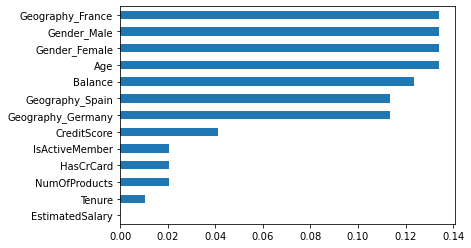

In [120]:
Ada_feature=pd.Series(model_AdaBoost_hyper_random.feature_importances_, index=x.columns)
Ada_feature.sort_values().plot(kind="barh")

In [121]:
print(len(model_lst))
print(len(testing_acc_lst))
print(len(training_acc_lst))

12
12
12


In [122]:
Final_DF=pd.DataFrame({"Model_Details":model_lst,
"Testing_Accuracy":testing_acc_lst,
"Training_Accuracy":training_acc_lst})
Final_DF


,Model_Details,Testing_Accuracy,Training_Accuracy
0,model_logestic,0.680060,0.672220
1,model_KNN,0.675540,0.790439
2,model_KNN_normal,0.820800,0.867867
3,model_KNN_normal_hyper_grid,0.816000,0.852667
4,model_KNN_std,0.819600,0.868667
5,model_KNN_std_hyper_grid,0.820000,0.855067
6,model_RF_without_hyper,0.897037,1.000000
7,model_RF_with_hyper_random,0.870668,0.883875
8,model_Decision,0.844299,1.000000
9,model_Decision_CCPrunning,0.846811,0.999414


I got best Accuracy on random forest with hyperparametric
tuning which is for Testing_Accuracy=0.88 and Traning_Accuracy=0.87
we use random forest With Hayperparameric Tunning for further calculation.

In [123]:
def per(x):
    if type(x)==float:
        x=x*100
        x=np.around(x,2)
        x=str(x)+" %"
        return x
    else:
        return x
x=0.781250
per(x)

'78.12 %'

# Training on single row

In [126]:
columns_name=x.columns
columns_name

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [137]:
x.head(1).T

,0
CreditScore,619.00
Age,42.00
Tenure,2.00
Balance,0.00
NumOfProducts,1.00
HasCrCard,1.00
IsActiveMember,1.00
EstimatedSalary,101348.88
Gender_Female,1.00
Gender_Male,0.00


In [143]:
# user intput
CreditScore = 600
Age= 55
Tenure = 2
Balance =1
NumOfProducts = 1
HasCrCard = 1
IsActiveMember = 0  
EstimatedSalary = 88000
Gender =  'Male'
Geography =  'France'

In [144]:
Gender= "Gender_"+ Gender
print(Gender)

Gender_Male


In [145]:
Geography ="Geography_"+ Geography
print(Geography)

Geography_France


In [146]:
Geography_index=np.where(columns_name == Geography)[0][0] # to find the index of a region
Geography_index

10

In [147]:
Gender_index=np.where(columns_name == Gender)[0][0] 
Gender_index

9

In [148]:
array=np.zeros(len(columns_name))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [149]:
array[0]=CreditScore
array[1]=Age
array[2]=Tenure
array[3]=Balance
array[4]=NumOfProducts
array[5]=HasCrCard
array[6]=IsActiveMember
array[7]=EstimatedSalary

array[Geography_index]=1
array[Gender_index]=1
array

array([6.0e+02, 5.5e+01, 2.0e+00, 1.0e+00, 1.0e+00, 1.0e+00, 0.0e+00,
       8.8e+04, 0.0e+00, 1.0e+00, 1.0e+00, 0.0e+00, 0.0e+00])

In [150]:
CreditScore = 600
Age= 55
Tenure = 2
Balance =1
NumOfProducts = 1
HasCrCard = 1
IsActiveMember = 0  
EstimatedSalary = 88000
Gender =  'male'
Geography =  'France'

In [152]:
Customer_churn = model_RF_with_hyper_random.predict([array])[0]
if Customer_churn == 0:
    print('The customers are unlikely to leave')
else:
    print('The customers are likely to leave.')

The customers are likely to leave


In [154]:
Customer_data  = {"columns":list(columns_name)}
Customer_data

{'columns': ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Gender_Female',
  'Gender_Male',
  'Geography_France',
  'Geography_Germany',
  'Geography_Spain']}

In [159]:
import json

with open("Customer_data.json", "w") as f:
    json.dump(Customer_data, f)

In [158]:
import pickle
with open("model_RF_with_hyper_random.pkl", "wb") as f:
    pickle.dump(model_RF_with_hyper_random, f)